# Analiza filmov

Uvozim vse datoteke, ki so potrebne za delovanje programa. Movies_data.csv je datoteka v kateri so shranjeni vsi podatki (naslov, gross income, ocene gledalcev in kritikov). Podatke sem dobil iz spletne strani `https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time/` in `https://www.rottentomatoes.com/`. Obseg zajema prvih 500 filmov po največjem dobičku iz prodaje kart.

In [145]:
# Paketi za obdelavo podatkov
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import jupiter as j
importlib.reload(j)
print(dir(j))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'graf', 'pd', 'plt', 'studijo']


In [146]:
# Naložim razpredelico movie_data.csv
filmi = pd.read_csv("../movie_data.csv")

In [147]:
# Prvih 10 v razpredelnici
filmi.head(10)

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
0,1,Avatar,"$2,923,706,026",82%,81%,James Cameron,20th Century Fox,"Dec 18, 2009"
1,2,Avengers: Endgame,"$2,748,242,781",90%,94%,"Anthony Russo, Joe Russo",Walt Disney,"Apr 26, 2019"
2,3,Avatar: The Way of Water,"$2,317,514,386",92%,76%,James Cameron,20th Century Studios,"Dec 16, 2022"
3,4,Titanic,"$2,223,048,786",69%,88%,James Cameron,"20th Century Fox,, Paramount Pictures","Dec 19, 1997"
4,6,Avengers: Infinity War,"$2,048,359,754",92%,85%,"Anthony Russo, Joe Russo",Walt Disney,"Apr 27, 2018"
5,7,Spider-Man: No Way Home,"$1,908,532,719",98%,93%,Jon Watts,Columbia Pictures,"Dec 17, 2021"
6,8,Jurassic World,"$1,669,963,641",78%,71%,Colin Trevorrow,Universal Pictures,"Jun 12, 2015"
7,9,The Lion King,"$1,646,106,779",93%,92%,"Roger Allers, Rob Minkoff",Walt Disney Pictures,"Jun 24, 1994"
8,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022"
9,14,Frozen II,"$1,451,653,316",92%,77%,"Chris Buck, Jennifer Lee",Walt Disney,"Nov 22, 2019"


In [148]:
# Zadnjih 10 v razpredelnici
filmi.tail(10)

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
1884,"2,981",My Cousin Vinny,"$52,929,168",87%,87%,Jonathan Lynn,20th Century Fox,"Mar 13, 1992"
1885,"2,982",Message in a Bottle,"$52,880,016",66%,32%,Luis Mandoki,"Warner Bros. Pictures,, Warner Bros.","Feb 12, 1999"
1886,"2,983",Outrageous Fortune,"$52,864,741",60%,58%,Arthur Hiller,"Touchstone Pictures,, Buena Vista Pictures","Jan 30, 1987"
1887,"2,986",American Gigolo,"$52,743,674",50%,75%,Paul Schrader,Paramount Pictures,"Feb 8, 1980"
1888,"2,990",The Night Before,"$52,568,099",NaN,NaN,Jay Holben,NaN,NaN
1889,"2,991",The Roommate,"$52,545,707",27%,3%,Christian E. Christiansen,Sony Pictures Entertainment,"Feb 4, 2011"
1890,"2,994",Big Fat Liar,"$52,461,017",44%,46%,Shawn Levy,Universal Pictures,"Feb 8, 2002"
1891,"2,995",Wild,"$52,460,543",71%,50%,Nicolette Krebitz,Universal Pictures,"Feb 8, 2002"
1892,"2,999",The Banshees of Inisherin,"$52,344,724",75%,96%,Martin McDonagh,Searchlight Pictures,"Nov 4, 2022"
1893,"3,000",Le Petit Nicolas,"$52,339,566",73%,60%,Laurent Tirard,Searchlight Pictures,"Nov 4, 2022"


In [149]:
# Ime in ocena gledalcev in kritikov
filmi[['Naslov', 'Ocena občinstva', 'Ocena kritikov']]

,Naslov,Ocena občinstva,Ocena kritikov
0,Avatar,82%,81%
1,Avengers: Endgame,90%,94%
2,Avatar: The Way of Water,92%,76%
3,Titanic,69%,88%
4,Avengers: Infinity War,92%,85%
...,...,...,...
1889,The Roommate,27%,3%
1890,Big Fat Liar,44%,46%
1891,Wild,71%,50%
1892,The Banshees of Inisherin,75%,96%


In [150]:
# Razpredelnica filmov s oceno občinstva nad 90%
f = filmi.copy()
high_rated = f[f['Ocena občinstva'] > "90%"].sort_values('Ocena občinstva', ascending=False)
high_rated

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
1870,"2,959",Jesus Revolution,"$53,381,966",99%,54%,"Jon Erwin, Brent McCorkle",Lionsgate,"Feb 24, 2023"
1236,"1,938",The Woman King,"$94,374,749",99%,94%,Gina Prince-Bythewood,TriStar Pictures,"Sep 16, 2022"
453,699,Sound of Freedom,"$250,729,678",99%,57%,Alejandro Monteverde,Angel Studios,"Jul 4, 2023"
8,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022"
408,635,The Godfather,"$270,007,394",98%,97%,Francis Ford Coppola,Paramount Pictures,"Mar 15, 1972"
...,...,...,...,...,...,...,...,...
1163,"1,820",Little Miss Sunshine,"$100,642,353",91%,91%,"Jonathan Dayton, Valerie Faris",Fox,"Jan 20, 2006,"
324,512,Green Book,"$319,995,019",91%,77%,Peter Farrelly,Universal Pictures,"Nov 21, 2018"
587,924,Straight Outta Compton,"$202,182,981",91%,89%,F. Gary Gray,Universal Pictures,"Aug 14, 2015"
358,561,Twisters,"$301,291,204",91%,75%,Lee Isaac Chung,Universal Pictures,"Jul 19, 2024"


In [151]:
# Razpredelnica filmov s kritikov in občinstva nad 90%
high_rated = filmi[(filmi['Ocena kritikov'] > "90%") & (filmi['Ocena občinstva'] > "90%")].sort_values('Ocena kritikov', ascending=False)
high_rated

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
154,251,How to Train Your Dragon,"$494,870,992",91%,99%,"Christopher Sanders, Dean DeBlois","DreamWorks SKG,, Paramount Pictures","Mar 26, 2010"
1346,"2,108",Das Boot,"$84,970,337",96%,98%,Wolfgang Petersen,"RCA/Columbia,, Columbia Pictures,, Columbia Tr...","Sep 17, 1981,"
1595,"2,500",Todo sobre mi madre,"$67,864,530",93%,98%,Pedro Almodóvar,"Sony Pictures Classics,, Sony Pictures Enterta...","Nov 24, 1999,"
36,53,Zootopia,"$1,002,462,578",92%,98%,"Byron Howard, Rich Moore",Walt Disney,"Mar 4, 2016"
408,635,The Godfather,"$270,007,394",98%,97%,Francis Ford Coppola,Paramount Pictures,"Mar 15, 1972"
510,797,Good Will Hunting,"$225,925,989",94%,97%,Gus Van Sant,Miramax Films,"Jan 9, 1998"
1335,"2,088",Apocalypse Now,"$85,959,710",94%,97%,Francis Ford Coppola,"United Artists,, Miramax Films,, Paramount Pic...","Aug 15, 1979,"
334,527,Knives Out,"$312,898,746",92%,97%,Rian Johnson,Lionsgate Films,"Nov 27, 2019"
1808,"2,861",Boyz n the Hood,"$56,215,095",93%,96%,John Singleton,"Criterion Collection,, Columbia Pictures","Jul 12, 1991"
8,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022"


In [152]:
#Razpredelnica filmov, ki imajo oceno občinstva višjo od kritikov
selected = filmi[filmi['Ocena občinstva'] > filmi['Ocena kritikov']].sort_values('Ocena občinstva', ascending=False)
selected

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
1870,"2,959",Jesus Revolution,"$53,381,966",99%,54%,"Jon Erwin, Brent McCorkle",Lionsgate,"Feb 24, 2023"
8,13,Top Gun: Maverick,"$1,464,642,326",99%,96%,Joseph Kosinski,Paramount Pictures,"May 27, 2022"
453,699,Sound of Freedom,"$250,729,678",99%,57%,Alejandro Monteverde,Angel Studios,"Jul 4, 2023"
1236,"1,938",The Woman King,"$94,374,749",99%,94%,Gina Prince-Bythewood,TriStar Pictures,"Sep 16, 2022"
408,635,The Godfather,"$270,007,394",98%,97%,Francis Ford Coppola,Paramount Pictures,"Mar 15, 1972"
...,...,...,...,...,...,...,...,...
1548,"2,429",Star Trek V: The Final Frontier,"$70,200,000",24%,23%,William Shatner,Paramount Pictures,"Jun 9, 1989"
1780,"2,805",Year One,"$57,604,723",24%,14%,Harold Ramis,Columbia Pictures,"Jun 19, 2009"
1679,"2,640",Random Hearts,"$63,200,000",24%,18%,Sydney Pollack,"Sony Pictures Entertainment,, Columbia Pictures","Oct 8, 1999"
1050,"1,647",Striptease,"$113,309,743",24%,13%,Andrew Bergman,NaN,NaN


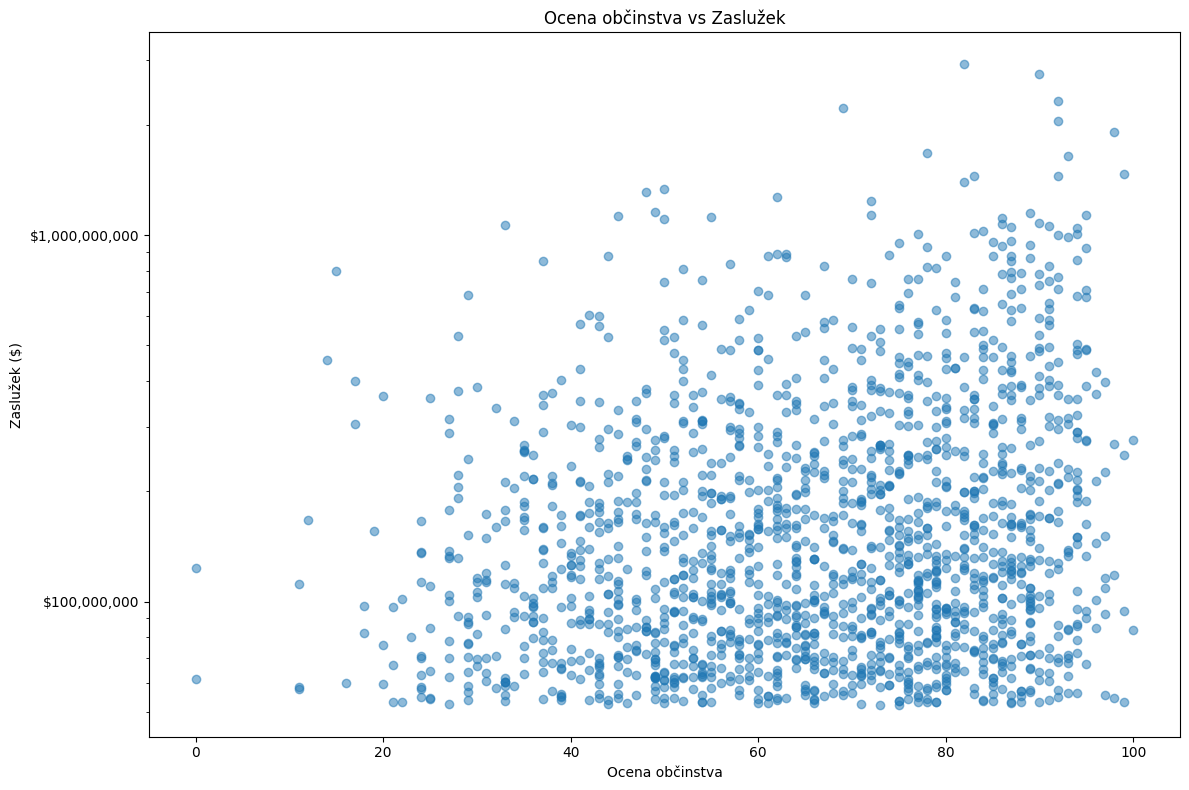

Koleracija med oceno občinstva in zaslužkom 0.19

Statistics:
       Numerično ocena občinstva  Numerično zaslužek
count                1687.000000        1.687000e+03
mean                   65.750445        2.155697e+08
std                    19.182614        2.509319e+08
min                     0.000000        5.233957e+07
25%                    52.000000        8.013406e+07
50%                    68.000000        1.273614e+08
75%                    82.000000        2.460367e+08
max                   100.000000        2.923706e+09

Število filmov, ki so bili uporabljeni v analizi: 1687


In [153]:
#Graf, ki kaže koleracijo med gross incom in oceno občinstva
j.graf(filmi)

Presenetljivo je to, da se večina filmov prodaja povprečno, ne glede na oceno. 

In [154]:
# Razpredelnica, ki prikazuje število filmov, glede na studie, ki so jih naredili in skupno prodajo filmov. Prav tako prikazuje povprečno oceno gledalcev in kritikov.
j.studijo(filmi)

,Število filmov,Total zaslužek,Povprečna ocena občinstva,Povprečna ocena kritikov
Studio,,,,
Warner Bros. Pictures,175,"$45,671,820,433",67.6%,59.4%
Universal Pictures,183,"$41,400,972,208",61.3%,56.3%
Paramount Pictures,177,"$40,020,923,654",67.0%,64.5%
20th Century Fox,162,"$38,377,750,248",62.6%,54.2%
Walt Disney,59,"$29,764,999,414",73.5%,68.1%
...,...,...,...,...
"Crunchyroll,, Sony Pictures Entertainment",1,"$54,503,994",98.0%,94.0%
Paladin,1,"$54,044,481",84.0%,86.0%
"Orion Pictures,, MGM/UA Home Entertainment Inc.",1,"$53,380,796",54.0%,64.0%


Opazimo, da je Warner Bros. Pictures kljub manjšemu številu filmov, vseeno prodal več kart.

In [155]:
# Razpredelnica filmov, ki so bili narejeni pred letom 2000

filmi['Datum izzida'] = pd.to_datetime(filmi['Datum izzida'], format='%B %d, %Y', errors='coerce')
selected = filmi[filmi['Datum izzida'].dt.year < 2000]

display(selected[['Rank', 'Naslov', 'Zaslužek', 'Ocena občinstva', 'Ocena kritikov', 'Direktor', 'Studio', 'Datum izzida']])

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
141,230,Godzilla,"$529,076,069",28%,20%,Roland Emmerich,Columbia Pictures,1998-05-19
170,276,Indiana Jones and the Last Crusade,"$474,171,806",94%,84%,Steven Spielberg,Paramount Pictures,1989-05-24
206,336,The Mummy,"$418,138,535",75%,62%,Stephen Sommers,Universal Pictures,1999-05-07
211,345,The Mummy,"$409,953,905",75%,62%,Stephen Sommers,Universal Pictures,1999-05-07
245,395,Godzilla,"$376,000,000",28%,20%,Roland Emmerich,Columbia Pictures,1998-05-19
264,421,Notting Hill,"$363,718,196",79%,84%,Roger Michell,"MCA/Universal Pictures [us],, Polygram",1999-05-28
269,436,The Flintstones,"$358,500,000",25%,23%,Brian Levant,"Argentina Video Home,, Universal Pictures",1994-05-27
288,458,Deep Impact,"$349,464,664",43%,45%,Mimi Leder,Paramount Pictures,1998-05-08
312,489,Indiana Jones and the Temple of Doom,"$333,080,271",82%,77%,Steven Spielberg,Paramount Pictures,1984-05-23
360,563,Rambo: First Blood Part II,"$300,400,000",60%,33%,George P. Cosmatos,"Artisan Entertainment,, TriStar Pictures,, Ima...",1985-05-24


In [156]:
# Razpredelnica filmov, ki ima vsaj 90% oceno kritikov in je bil narejen po letu 2008

filmi['Datum izzida'] = pd.to_datetime(filmi['Datum izzida'], format='%B %d, %Y', errors='coerce')
filmi['Ocena kritikov'] = pd.to_numeric(filmi['Ocena kritikov'].astype(str).str.rstrip('%'), errors='coerce')

selected = filmi[(filmi['Ocena kritikov'] > 90) & (filmi['Datum izzida'].dt.year > 2008)]

display(selected[['Rank', 'Naslov', 'Zaslužek', 'Ocena občinstva', 'Ocena kritikov', 'Direktor', 'Studio', 'Datum izzida']])

,Rank,Naslov,Zaslužek,Ocena občinstva,Ocena kritikov,Direktor,Studio,Datum izzida
8,13,Top Gun: Maverick,"$1,464,642,326",99%,96.0,Joseph Kosinski,Paramount Pictures,2022-05-27
82,132,Up,"$731,463,377",90%,98.0,"Pete Docter, Bob Peterson","Pixar Animation Studios,, Walt Disney",2009-05-29
232,378,Star Trek,"$386,839,614",91%,94.0,J.J. Abrams,Paramount Pictures,2009-05-07
252,408,Mad Max: Fury Road,"$368,297,521",86%,97.0,George Miller,Warner Bros. Pictures,2015-05-15
367,576,A Quiet Place: Part II,"$296,650,356",92%,91.0,John Krasinski,Paramount Pictures,2021-05-28
1270,"1,992",Drag Me To Hell,"$91,388,487",62%,92.0,Sam Raimi,Universal Pictures,2009-05-29
1746,"2,750",The Nice Guys,"$59,596,747",79%,91.0,Shane Black,Warner Bros. Pictures,2016-05-20
1753,"2,761",Beast,"$59,168,339",74%,92.0,Michael Pearce,"Roadside Attractions,, 30West",2018-05-11
